In [1]:
import pandas as pd
import ast
from tqdm import tqdm
import re

import nltk
from nltk.collocations import *

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from tqdm import tqdm

import string
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
from scipy.stats import mannwhitneyu

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jaspreet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:

def count_finer_distribution(df, full_df):
    finer_counts = {}
    finer_counts_proportion = {}
    
    finer_counts_full_df = {}

    
    finer_all = list(df['finer_updated']) 
    for i in finer_all:
#         clean = ast.literal_eval(i)
        clean = i
        
        for lab in clean:
            if lab not in finer_counts:
                finer_counts[lab] = 0
            finer_counts[lab]+=1
            
    finer_all_full = list(full_df['finer_updated'])
    for j in finer_all_full:
#         clean = ast.literal_eval(i)
        clean_full = j

        for lab_full in clean_full:
            if lab_full not in finer_counts_full_df:
                finer_counts_full_df[lab_full] = 0
            finer_counts_full_df[lab_full]+=1

    # for x sample of imigrants, and x sample of rest of identities, how many immi tagged wtih gov critique
    for finer_label in finer_counts:
        finer_counts_proportion[finer_label] = (finer_counts[finer_label]/df.shape[0]) / finer_counts_full_df[finer_label]

    return finer_counts_proportion
    
    
    
def count_finer(df):
    finer_counts = {}
    finer_counts_proportion = {}
    
    finer_counts_full_df = {}
    
    finer_all = list(df['finer_updated'])
    for i in finer_all:
        clean = i
        
        for lab in clean:
            if lab not in finer_counts:
                finer_counts[lab] = 0
            finer_counts[lab]+=1    
            
    for finer_label in finer_counts:
        finer_counts_proportion[finer_label] = finer_counts[finer_label] / df.shape[0]
    return finer_counts_proportion
    


def count_co(one, two, df):
    # out of tweets that contain homeless vet, calculate proportion that also contain immigrant 
    vet_immi = 0
    both = 0
    for idx, row in df.iterrows():
        if row[one] == True or row[two] == True:
            both+=1
            
        if row[one] == True and row[two] == True:
            vet_immi+=1
    print(vet_immi/both)
    
    

def run_man_whitney(df, df_orig):
    num_trials = 10000
    cats = ['deserving_undeserving_of_resources', 'government_critique', 'money_aid_resource_allocation',\
            'solutions_interventions', 'societal_critique', 'harmful_generalization', 'personal_interaction_observation_of_homelessness',\
           'not_in_my_backyard','media_portrayal']

    for frame in cats:
        print("Frame: ", frame)

        iden_pop = []
        non_iden_pop = []

        for trial in tqdm(range(num_trials)):
            if df.shape[0] < 50:
                n = df.shape[0]
            else:
                n=50
            sample_id = count_finer(df.sample(n=n, replace=False))
            sample_non_id = count_finer(df_orig.sample(n=50, replace=False))

            if frame in sample_id:
                iden_pop.append(sample_id[frame])
            else:
                iden_pop.append(0)

            if frame in sample_non_id:
                non_iden_pop.append(sample_non_id[frame])
            else:
                non_iden_pop.append(0)

        print(mannwhitneyu(iden_pop, non_iden_pop, alternative='greater'))
    

# Load Data

In [6]:
deserv_undeserv_subset = pd.read_csv('../analysis_data/identity_analysis.csv')

# Distribution plot

In [7]:
# divide by column and row
immi = count_finer_distribution(deserv_undeserv_subset[(deserv_undeserv_subset["contains_immi"] == True)], deserv_undeserv_subset)
asylum = count_finer_distribution(deserv_undeserv_subset[(deserv_undeserv_subset["contains_asylum"] == True)], deserv_undeserv_subset)
refugee = count_finer_distribution(deserv_undeserv_subset[(deserv_undeserv_subset["contains_refugee"] == True)], deserv_undeserv_subset)
veh = count_finer_distribution(deserv_undeserv_subset[(deserv_undeserv_subset["contains_homeless_vet"] == True)], deserv_undeserv_subset)

illegal_alien = count_finer_distribution(deserv_undeserv_subset[(deserv_undeserv_subset["contains_illegal_alien"] == True)], deserv_undeserv_subset)
homeless_people = count_finer_distribution(deserv_undeserv_subset[(deserv_undeserv_subset["contains_homeless_people"] == True)], deserv_undeserv_subset)
homeless_americans = count_finer_distribution(deserv_undeserv_subset[(deserv_undeserv_subset["contains_homeless_americans"] == True)], deserv_undeserv_subset)
contains_homeless_refugees = count_finer_distribution(deserv_undeserv_subset[(deserv_undeserv_subset["contains_homeless_refugees"] == True)], deserv_undeserv_subset)
# contains_ukrainian_refugees = count_finer_distribution(deserv_undeserv_subset[(deserv_undeserv_subset["contains_ukrainian_refugees"] == True)], deserv_undeserv_subset)

contains_ukrainian_refugees = count_finer_distribution(deserv_undeserv_subset[(deserv_undeserv_subset["contains_ukraine"] == True)], deserv_undeserv_subset)

contains_illegal_immigrants = count_finer_distribution(deserv_undeserv_subset[(deserv_undeserv_subset["contains_illegal_immigrants"] == True)], deserv_undeserv_subset)
contains_homeless_immigrants = count_finer_distribution(deserv_undeserv_subset[(deserv_undeserv_subset["contains_homeless_immigrants"] == True)], deserv_undeserv_subset) 
random = count_finer_distribution(deserv_undeserv_subset.sample(n=34000, replace=False, random_state=6), deserv_undeserv_subset)

identites_distribution = pd.DataFrame([veh, homeless_americans, immi, illegal_alien, contains_illegal_immigrants, contains_homeless_immigrants, refugee, contains_homeless_refugees, contains_ukrainian_refugees,asylum, homeless_people, random]).T.reset_index()
identites_distribution = identites_distribution.set_index('index')


/tmp/ipykernel_34783/3260063379.py:52: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(co_occurrence_sub, dtype=np.bool))


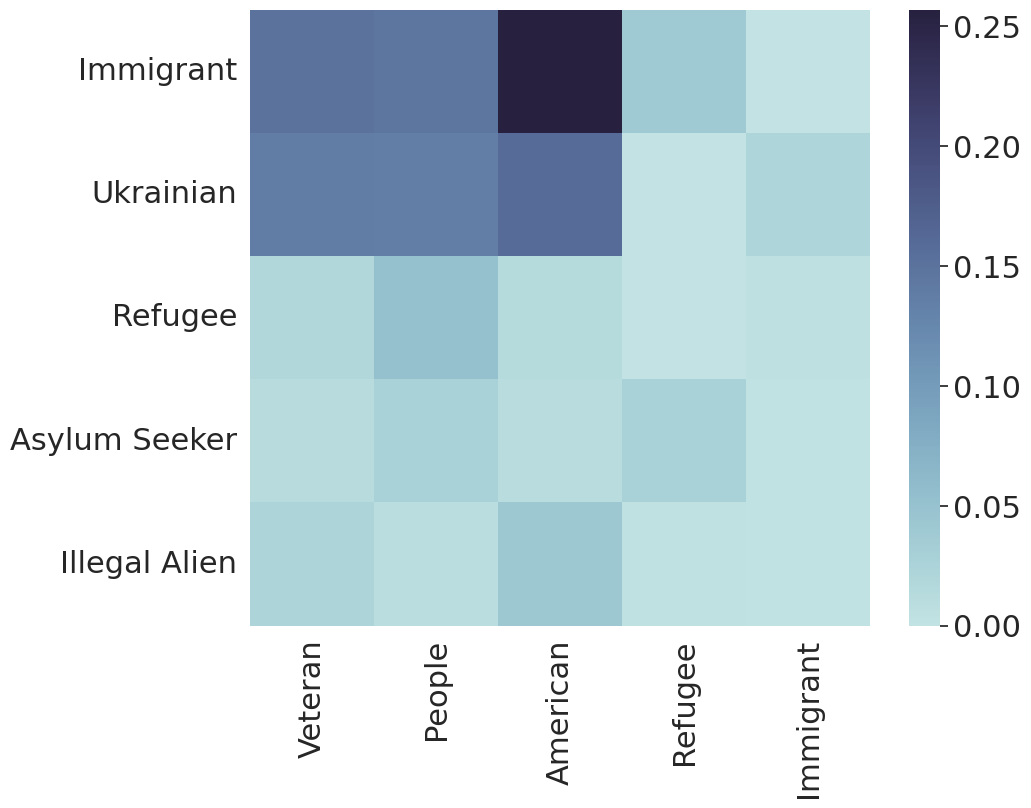

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Function to generate co-occurrence matrix
def co_occurrence_matrix_func(df):
    columns = df.columns
    num_columns = len(columns)
    co_occurrence_matrix = pd.DataFrame(np.zeros((num_columns, num_columns)), columns=columns, index=columns)

    for col1 in range(num_columns):
        for col2 in range(col1+1, num_columns):
            co_occurrence_matrix.iloc[col1, col2] = np.sum(df[columns[col1]] & df[columns[col2]])
            co_occurrence_matrix.iloc[col2, col1] = co_occurrence_matrix.iloc[col1, col2]
    
    for col in co_occurrence_matrix.columns:
        co_occurrence_matrix[col] = co_occurrence_matrix[col]/ np.sum(np.array(df[col].tolist()))

    
    return co_occurrence_matrix

all_populations = ["contains_homeless_vet", "contains_immi", "contains_refugee", "contains_asylum",
                  "contains_illegal_alien", "contains_homeless_americans",
                  "contains_homeless_refugees", "contains_homeless_people","contains_ukraine",
                   "contains_homeless_immigrants"]

df_sub = deserv_undeserv_subset[deserv_undeserv_subset.columns.intersection(all_populations)].reset_index()
df_sub = df_sub.drop(['index'], axis=1)

df_sub = df_sub.rename(columns={"contains_homeless_vet":"Homeless Veteran", "contains_immi":"Immigrant", "contains_refugee": "Refugee", 
                                "contains_asylum": "Asylum Seeker","contains_illegal_alien":"Illegal Alien", "contains_homeless_americans":"Homeless American",
                                "contains_homeless_refugees":"Homeless Refugee", "contains_ukraine":"Ukrainian", 
                                "contains_homeless_immigrants":"Homeless Immigrant", "contains_homeless_people":"Homeless People"})

# Generating the co-occurrence matrix
co_occurrence = co_occurrence_matrix_func(df_sub)

# Plotting the co-occurrence matrix as a heatmap using Seaborn
plt.figure(figsize=(10, 8))

# co_occurrence_sub = co_occurrence.drop(["Homeless Refugee","Homeless Immigrant"])

co_occurrence_sub = co_occurrence.drop(["Homeless Veteran", "Homeless People", "Homeless American", "Homeless Refugee","Homeless Immigrant"])
co_occurrence_sub = co_occurrence_sub.drop(["Immigrant", "Refugee", "Asylum Seeker", "Illegal Alien", "Ukrainian"], axis=1)

co_occurrence_sub = co_occurrence_sub.reindex(["Immigrant", "Ukrainian", "Refugee", "Asylum Seeker", "Illegal Alien"])
# #'Homeless Refugee', 'Homeless Immigrant'

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(co_occurrence_sub, dtype=np.bool))
# colors=sns.color_palette("viridis", as_cmap=True)
# colors=sns.color_palette("light:#5A9", as_cmap=True)
colors=sns.color_palette("ch:s=0.2,r=-0.3", as_cmap=True)

sns.set(font_scale=2) # font size 2
# sns.set_style('white')

import matplotlib.patches as mpatches

    
heatmap = sns.heatmap(co_occurrence_sub, annot=False, cmap=colors, fmt='g')
new_labels = ['Veteran', 'People', 'American', 'Refugee', 'Immigrant']
heatmap.set_xticklabels(new_labels, rotation=90)



# plt.savefig("../../plots/co_occurrence_identity.pdf",bbox_inches='tight')
plt.show()

# Significance Testing

In [9]:
veh_ukraine = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_vet"] == True) & (deserv_undeserv_subset["contains_ukraine"] == True)]          
veh_illegal_alien = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_vet"] == True) & (deserv_undeserv_subset["contains_illegal_alien"] == True)]
veh_asylum = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_vet"] == True) & (deserv_undeserv_subset["contains_asylum"] == True)]
veh_refugee = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_vet"] == True) & (deserv_undeserv_subset["contains_refugee"] == True)]
veh_immigrant = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_vet"] == True) & (deserv_undeserv_subset["contains_immi"] == True)]


# for each co-occurrence, look at the distribution of attitudes
peh_ukraine = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_people"] == True) & (deserv_undeserv_subset["contains_ukraine"] == True)]
peh_illegal_alien = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_people"] == True) & (deserv_undeserv_subset["contains_illegal_alien"] == True)]
peh_asylum = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_people"] == True) & (deserv_undeserv_subset["contains_asylum"] == True)]
peh_refugee = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_people"] == True) & (deserv_undeserv_subset["contains_refugee"] == True)]
peh_immigrant = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_people"] == True) & (deserv_undeserv_subset["contains_immi"] == True)]


# for each co-occurrence, look at the distribution of attitudes
homeless_american_ukraine = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_americans"] == True) & (deserv_undeserv_subset["contains_ukraine"] == True)]
homeless_american_illegal_alien = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_americans"] == True) & (deserv_undeserv_subset["contains_illegal_alien"] == True)]
homeless_american_asylum = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_americans"] == True) & (deserv_undeserv_subset["contains_asylum"] == True)]
homeless_american_refugee = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_americans"] == True) & (deserv_undeserv_subset["contains_refugee"] == True)]
homeless_american_immigrant = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_americans"] == True) & (deserv_undeserv_subset["contains_immi"] == True)]


# for each co-occurrence, look at the distribution of attitudes
homeless_refugee_ukraine = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_refugees"] == True) & (deserv_undeserv_subset["contains_ukraine"] == True)]
homeless_refugee_illegal_alien = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_refugees"] == True) & (deserv_undeserv_subset["contains_illegal_alien"] == True)]
homeless_refugee_asylum = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_refugees"] == True) & (deserv_undeserv_subset["contains_asylum"] == True)]
homeless_refugee_refugee = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_refugees"] == True) & (deserv_undeserv_subset["contains_refugee"] == True)]
homeless_refugee_immigrant = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_refugees"] == True) & (deserv_undeserv_subset["contains_immi"] == True)]


# for each co-occurrence, look at the distribution of attitudes
homeless_immigrant_ukraine = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_immigrants"] == True) & (deserv_undeserv_subset["contains_ukraine"] == True)]
homeless_immigrant_illegal_alien = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_immigrants"] == True) & (deserv_undeserv_subset["contains_illegal_alien"] == True)]
homeless_immigrant_asylum = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_immigrants"] == True) & (deserv_undeserv_subset["contains_asylum"] == True)]
homeless_immigrant_refugee = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_immigrants"] == True) & (deserv_undeserv_subset["contains_refugee"] == True)]
homeless_immigrant_immigrant = deserv_undeserv_subset.loc[(deserv_undeserv_subset["contains_homeless_immigrants"] == True) & (deserv_undeserv_subset["contains_immi"] == True)]



                                                      
all_co_occur_identities = [veh_ukraine, veh_illegal_alien, veh_asylum, veh_refugee, veh_immigrant, 
                           peh_ukraine, peh_illegal_alien, peh_asylum, peh_refugee, peh_immigrant, 
                           homeless_american_ukraine, homeless_american_illegal_alien, 
                           homeless_american_asylum,homeless_american_refugee,homeless_american_immigrant,
                           homeless_refugee_ukraine, homeless_refugee_illegal_alien, homeless_refugee_asylum, 
                           homeless_refugee_refugee, homeless_refugee_immigrant, homeless_immigrant_ukraine, 
                           homeless_immigrant_illegal_alien, homeless_immigrant_asylum, homeless_immigrant_refugee, 
                           homeless_immigrant_immigrant]
                                                      
                                                      
df_all_co_occur = pd.concat(all_co_occur_identities)

# for each co-occurrence, look at the distribution of attitudes
df_veh_co_occur = pd.concat([veh_ukraine, veh_illegal_alien, veh_asylum, veh_refugee, veh_immigrant])
df_peh_co_occur = pd.concat([peh_ukraine, peh_illegal_alien, peh_asylum, peh_refugee, peh_immigrant])
df_homeless_american_co_occur = pd.concat([homeless_american_ukraine, homeless_american_illegal_alien, homeless_american_asylum,homeless_american_refugee,homeless_american_immigrant])
df_homeless_refugee_co_occur = pd.concat([homeless_refugee_ukraine, homeless_refugee_illegal_alien, homeless_refugee_asylum, homeless_refugee_refugee, homeless_refugee_immigrant, homeless_immigrant_ukraine])
df_homeless_immi_co_occur = pd.concat([homeless_immigrant_illegal_alien, homeless_immigrant_asylum, homeless_immigrant_refugee, homeless_immigrant_immigrant])




In [ ]:
for id_iden, iden in enumerate([veh_ukraine, veh_illegal_alien, veh_asylum, veh_refugee, veh_immigrant]):
    print(id_iden)
    run_man_whitney(iden, df_veh_co_occur)

In [ ]:
for id_iden, iden in enumerate([peh_ukraine, peh_illegal_alien, peh_asylum, peh_refugee, peh_immigrant]):
    print(id_iden)
    run_man_whitney(iden, df_peh_co_occur)

In [ ]:
for id_iden, iden in enumerate([homeless_american_ukraine, homeless_american_illegal_alien, homeless_american_asylum,homeless_american_refugee,homeless_american_immigrant]):
    print(id_iden)
    run_man_whitney(iden, df_homeless_american_co_occur)

# Preprocess data manually from 2.4M Analysis Set

In [17]:
# for all the tweets that contain immigrant, plot the most salient frames

# load set of annotations

def load_anns(identity_path, analysis_path):
    print("starting to read anns")
#     anns = pd.read_pickle("data/tweets_filtered_3mil_identity_additional_expanded.pkl") 
    anns = pd.read_jsonl(identity_path, lines=True) #identity_full.csv

    print("read anns")
    print("starting to read flan anns")
#     flan_anns = pd.read_json("/home/brihi/characterizing-attitudes-towards-homelessness/original_twitter_data/all_3mil_flan_preds.jsonl", lines=True)
    flan_anns = pd.read_json(analysis_path, lines=True)

    print("read both anns and flan anns")
    flags = []

    for idx, row in flan_anns.iterrows():
        if idx % 10000 == 0:
            print(idx)
        finer = row['frames']
        if len(finer) == 0 or '0' in finer or finer=='[]':
            flags.append(False)
        else:
            flags.append(True)
    df_orig = flan_anns[flags]

    print("df_orig shape: ", df_orig.shape)

    anns_subset = anns.iloc[df_orig.index]

    df_orig['contains_immi'] = anns_subset['contains_immi']
    df_orig['contains_vet'] = anns_subset['contains_vet']
    df_orig['contains_refugee'] = anns_subset['contains_refugee']
    df_orig['contains_asylum'] = anns_subset['contains_asylum']


    df_orig['contains_homeless_vet'] = anns_subset['contains_homeless_vet']
    df_orig['contains_illegal_alien'] = anns_subset['contains_illegal_alien']
    df_orig['contains_homeless_people'] = anns_subset['contains_homeless_people']
    df_orig['contains_homeless_americans'] = anns_subset['contains_homeless_americans']
    df_orig['contains_american_citizens'] = anns_subset['contains_american_citizens']
    df_orig['contains_homeless_refugees'] = anns_subset['contains_homeless_refugees']   
    df_orig['contains_ukrainian_refugees'] = anns_subset['contains_ukrainian_refugees']
    df_orig['contains_illegal_immigrants'] = anns_subset['contains_illegal_immigrants']
    df_orig['contains_homeless_immigrants'] = anns_subset['contains_homeless_immigrants']
    df_orig['contains_ukraine'] = anns_subset['contains_ukraine']

    ret_anns = df_orig[(df_orig['contains_immi'] == True) | 
                       (df_orig['contains_refugee'] == True) | 
                       (df_orig['contains_asylum'] == True) | 
                       (df_orig['contains_homeless_vet'] == True) | 
                       (df_orig['contains_illegal_alien'] == True) | 
                       (df_orig['contains_homeless_americans'] == True) | 
                       (df_orig['contains_homeless_refugees'] == True) | 
                       (df_orig['contains_ukrainian_refugees'] == True) | 
                       (df_orig['contains_illegal_immigrants'] == True) | 
                       (df_orig['contains_homeless_immigrants'] == True) |
                      (df_orig['contains_homeless_people'] == True) |
                      (df_orig['contains_ukraine'] == True)]

    ret_anns_non_identity = df_orig[~df_orig.index.isin(ret_anns.index)]

    print(ret_anns.shape)
    print(ret_anns_non_identity.shape)
        
    return ret_anns, ret_anns_non_identity, df_orig




identity_path = '' # from huggingface: peh_vulnerable_populations.jsonl
analysis_path = '' # from huggingface: model_predicted_annotations.jsonl
anns, anns_non_identity, df_orig = load_anns(identity_path, analysis_path)

print(anns.shape)
print(anns_non_identity.shape)
print(df_orig.shape)

x = anns['frames'].tolist()
deserv_undeserv_idx = []

for idx, val in enumerate(x):
    if 'deserving_undeserving_of_resources' in val:
        deserv_undeserv_idx.append(idx)
               
deserv_undeserv_subset = anns.iloc[deserv_undeserv_idx]
df_veh_immig_ref_deserv_undeserv = deserv_undeserv_subset[(deserv_undeserv_subset["contains_homeless_vet"] == True) | (deserv_undeserv_subset["contains_immi"] == True) | (deserv_undeserv_subset["contains_refugee"] == True) | (deserv_undeserv_subset["contains_asylum"] == True)]

print(deserv_undeserv_subset.shape)
print(df_veh_immig_ref_deserv_undeserv.shape)

x = deserv_undeserv_subset['frames'].tolist()

for idx, val in enumerate(x):
    if 'deserving_undeserving_of_resources' not in val:
        print('error')


# modify 'immigrant' and 'refugee' to be distinct 

immi_col = deserv_undeserv_subset['contains_immi'].tolist()
# il_immi_col = deserv_undeserv_subset['contains_illegal_immigrants'].tolist()
ref_col = deserv_undeserv_subset['contains_refugee'].tolist()
ukraine_col = deserv_undeserv_subset['contains_ukraine'].tolist()

h_immi_col = deserv_undeserv_subset['contains_homeless_immigrants'].tolist()
h_ref_col = deserv_undeserv_subset['contains_homeless_refugees'].tolist()
# u_ref_col = deserv_undeserv_subset['contains_ukrainian_refugees'].tolist()


for idx, val in enumerate(h_immi_col):
    if val == True:
        immi_col[idx] = False
        
for idx, val in enumerate(h_ref_col):
    if val==True:
        ref_col[idx] = False
    
for idx, val in enumerate(h_ref_col):
    if val==True and ukraine_col[idx] == True:
        h_ref_col[idx] = False
        
for idx, val in enumerate(ref_col):
    if val==True and ukraine_col[idx] == True:
        ref_col[idx] = False
 

        
deserv_undeserv_subset['contains_immi'] = immi_col
deserv_undeserv_subset['contains_refugee'] = ref_col
deserv_undeserv_subset['contains_homeless_refugees'] = h_ref_col

(153604, 47)
(97217, 47)
